In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

url = "okajakpril.csv"

origin = reader(url, parse_dates=["tap_in_time", "tap_out_time"])

origin.iloc[:5, :6]

,trans_id,pay_card_id,pay_card_bank,pay_card_name,pay_card_sex,pay_card_birth_date
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982


In [2]:
origin.iloc[:5, 6:12]

,corridor_id,corridor,direction,tap_in_stop,tap_in_stop_name,stop_start_seq
0,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,7
1,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,13
2,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,38
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,23
4,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,5


In [3]:
origin.iloc[:5, 12:]

,tap_in_time,tap_out_stop,tap_out_stop_name,stop_end_seq,tap_out_time,profit,in_day,selisih,in_hour
0,2023-04-03 05:21:44,P00253,Tegalan,12.0,2023-04-03 06:00:53,3500,Monday,39,5
1,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500,Monday,57,5
2,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500,Monday,51,5
3,2023-04-03 05:44:51,B03090P,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500,Monday,43,5
4,2023-04-03 06:17:35,P00098,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500,Monday,39,6


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
double = origin.duplicated()

double.sum()

0

In [6]:
totalprofit = origin["profit"].sum()

totalprofit

86359000

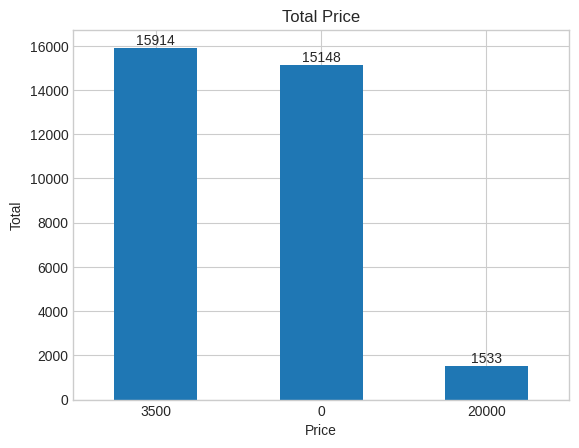

In [7]:
total = origin["profit"].value_counts()

plot = total.plot.bar(title="Total Price", rot=0)

plot.set_xlabel("Price")

plot.set_ylabel("Total")

plot.bar_label(plot.containers[0]);

In [8]:
nul = origin[origin["profit"] == 0]

sel = round(len(nul) / len(origin), 8) * 100

sel

46.473385

In [9]:
jak = nul[nul["corridor_id"].str.startswith("JAK")]

sel = round(len(jak) / len(nul), 8) * 100

sel

78.736467

In [10]:
sel = round(len(jak) / len(origin), 8) * 100

sel

36.591502

In [11]:
import numpy as np

nul["jak"] = np.where(nul["corridor_id"].str.startswith("JAK"), 1, 0)

nul.iloc[:5, 16:]

,tap_out_time,profit,in_day,selisih,in_hour,jak
9,2023-04-03 06:50:21,0,Monday,28,6,0
12,2023-04-03 06:09:17,0,Monday,30,5,1
17,2023-04-03 07:30:45,0,Monday,46,6,1
21,2023-04-03 06:12:52,0,Monday,29,5,1
24,2023-04-03 06:42:12,0,Monday,52,5,0


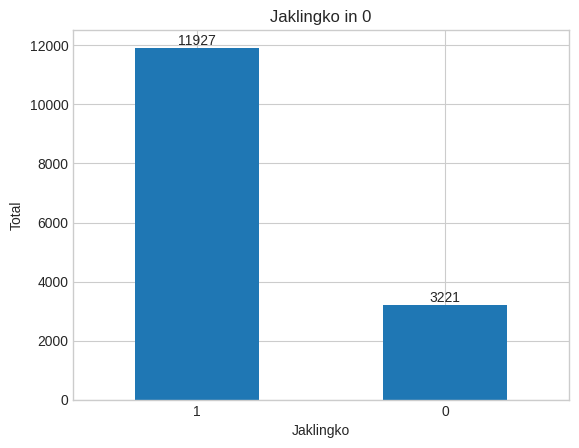

In [12]:
jato = nul["jak"].value_counts()

plot = jato.plot.bar(rot=0, title="Jaklingko in 0")

plot.set_xlabel("Jaklingko")

plot.set_ylabel("Total")

plot.bar_label(plot.containers[0]);

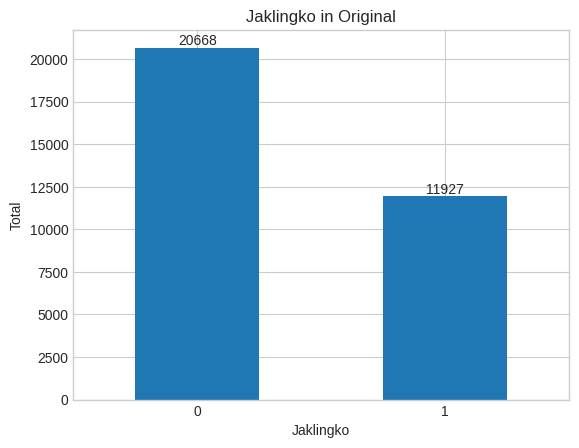

In [13]:
origin["jak"] = np.where(origin["corridor_id"].str.startswith("JAK"), 1, 0)

jato = origin["jak"].value_counts()

title = "Jaklingko in Original"

plot = jato.plot.bar(rot=0, title=title)

plot.set_xlabel("Jaklingko")

plot.set_ylabel("Total")

plot.bar_label(plot.containers[0]);